Assignment on Data Cleaning and Data Aggregation:                                                                            
Sandeep Anumula                                                                                      
Nikhil Bathini                                                          
Saiprashanth Reddy Dyapa                                                                                 
Shirisha Teegala                                                                                                
Nikith Vemula                                                                                              

Data cleaning: olympics.csv In this exercise, we will use various techniques to do data cleaning for olympics.csv file and answer the following questions.
Drop all of the countries which don’t have gold medals, and save the cleaned one back into a new .csv file.

In [120]:
import pandas as pd

# Load the dataset (skip the first row as it's extra header info)
df = pd.read_csv('olympics.csv')

# Rename columns for clarity
df.columns = ['Country', 'Summer_Events', 'Summer_Gold', 'Summer_Silver', 'Summer_Bronze', 'Summer_Total',
              'Winter_Events', 'Winter_Gold', 'Winter_Silver', 'Winter_Bronze', 'Winter_Total',
              'Overall_Events', 'Overall_Gold', 'Overall_Silver', 'Overall_Bronze', 'Total_Medals']

# Keep only rows where 'Overall_Gold' is a number and greater than zero
df = df[pd.to_numeric(df['Overall_Gold'], errors='coerce').fillna(0).astype(int) > 0]

# Save the cleaned dataset
df.to_csv('olympics_newfile.csv', index=False)

print("Cleaned dataset saved successfully!")
df



Cleaned dataset saved successfully!


,Country,Summer_Events,Summer_Gold,Summer_Silver,Summer_Bronze,Summer_Total,Winter_Events,Winter_Gold,Winter_Silver,Winter_Bronze,Winter_Total,Overall_Events,Overall_Gold,Overall_Silver,Overall_Bronze,Total_Medals
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
5,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
6,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Venezuela (VEN),17,2,2,8,12,4,0,0,0,0,21,2,2,8,12
142,Yugoslavia (YUG) [YUG],16,26,29,28,83,14,0,3,1,4,30,26,32,29,87
145,Zimbabwe (ZIM) [ZIM],12,3,4,1,8,1,0,0,0,0,13,3,4,1,8
146,Mixed team (ZZX) [ZZX],3,8,5,4,17,0,0,0,0,0,3,8,5,4,17


Output the top five gold medal countries

In [118]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('olympics_newfile.csv')

# Sort by gold medals in descending order
df = df.sort_values('Overall_Gold', ascending=False)

# Remove any row where 'Country' contains "Total"
df = df[~df['Country'].str.contains("Total", case=False, na=False)]

# Get the top 5 countries
top_countries = df[['Country', 'Overall_Gold']].head(5)

# Display the result
print("Top countries with the most gold medals:")
print(top_countries)


Top countries with the most gold medals:
                                Country  Overall_Gold
93  United States (USA) [P] [Q] [R] [Z]          1072
73             Soviet Union (URS) [URS]           473
32              Germany (GER) [GER] [Z]           252
36        Great Britain (GBR) [GBR] [Z]           246
46                  Italy (ITA) [M] [S]           235


Output the countries that have all three kinds of medals for both summer and winter games

In [119]:
import pandas as pd

# Load dataset
df = pd.read_csv('olympics_newfile.csv')

# Filter countries that have won at least one gold, silver, and bronze in both Summer and Winter Games
df = df[
    (df['Summer_Gold'] > 0) & (df['Summer_Silver'] > 0) & (df['Summer_Bronze'] > 0) &
    (df['Winter_Gold'] > 0) & (df['Winter_Silver'] > 0) & (df['Winter_Bronze'] > 0)
]

# Keep only relevant columns
df = df[['Country', 'Summer_Gold', 'Summer_Silver', 'Summer_Bronze', 
         'Winter_Gold', 'Winter_Silver', 'Winter_Bronze']]

# Print results
print("Countries with all three medals in both Summer and Winter Games:")
print(df)


Countries with all three medals in both Summer and Winter Games:
                                 Country  Summer_Gold  Summer_Silver  \
4              Australia (AUS) [AUS] [Z]          139            152   
5                          Austria (AUT)           18             33   
8                          Belarus (BLR)           12             24   
9                          Belgium (BEL)           37             52   
11                    Bulgaria (BUL) [H]           51             85   
..                                   ...          ...            ...   
82                      Sweden (SWE) [Z]          143            164   
83                     Switzerland (SUI)           47             73   
91                         Ukraine (UKR)           33             27   
93   United States (USA) [P] [Q] [R] [Z]          976            757   
100                               Totals         4809           4775   

     Summer_Bronze  Winter_Gold  Winter_Silver  Winter_Bronze  
4     

You may use previous unit learned concepts on multi-level indexing, pivoting, stacking to rearrange the original .csv file to convert summer and winter as secondary level index within the country index, and then generate a new .csv file which will have country as the primary index, then summer and winter as secondary index, and columns of gold, silver, and bronze medals

In [123]:
import pandas as pd

# Load dataset
df = pd.read_csv('olympics_newfile.csv')

# Reshape data to have 'Country' as primary index and 'Season' as secondary index
df = df.melt(id_vars=['Country'], 
             value_vars=['Summer_Gold', 'Summer_Silver', 'Summer_Bronze',
                         'Winter_Gold', 'Winter_Silver', 'Winter_Bronze'],
             var_name='Season_Medal', value_name='Count')

# Split 'Season_Medal' into 'Season' and 'Medal' columns
df[['Season', 'Medal']] = df['Season_Medal'].str.split('_', expand=True)

# Drop the old column
df = df.drop(columns=['Season_Medal'])

# Pivot to structure the data with multi-level index
df = df.pivot_table(index=['Country', 'Season'], columns='Medal', values='Count', aggfunc='sum')

# Save to new CSV file
df.to_csv('olympics_restructured.csv')

# Display result
print("Data saved as 'olympics_restructured.csv'.")
print(df.head(10))  # Preview first 10 rows


Data saved as 'olympics_restructured.csv'.
Medal                             Bronze  Gold  Silver
Country                   Season                      
Algeria (ALG)             Summer       8     5       2
                          Winter       0     0       0
Argentina (ARG)           Summer      28    18      24
                          Winter       0     0       0
Armenia (ARM)             Summer       9     1       2
                          Winter       0     0       0
Australasia (ANZ) [ANZ]   Summer       5     3       4
                          Winter       0     0       0
Australia (AUS) [AUS] [Z] Summer     177   139     152
                          Winter       4     5       3


Data Wrangling on Sacramentorealestatetransactions.csv file In this exercise, we will use various techniques to do data wrangling on the data from  Sac- ramentorealestatetransactions.csv file to answer the following questions: 

In [79]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

5.With Hierarchical Indexing, rearrange the data to create a first DataFrame which will have first level of index of city, second level of index of zip, please also rename index and column to make them more understandable, such as change zip to zipcode. Display the first eight rows of data. Do some plotting to reflect this new DataFrame

In [93]:
# Read the csv file
df1 = pd.read_csv('Sacramentorealestatetransactions.csv')

# Set the hierarchical index
df1 = df1.set_index(['city', 'zip'])
df1.index.names = ['City', 'Zipcode']
df1.head(30)

street state  beds  baths  sq__ft  \
City       Zipcode                                                     
SACRAMENTO 95838             3526 HIGH ST    CA     2      1     836   
           95823              51 OMAHA CT    CA     3      1    1167   
           95815           2796 BRANCH ST    CA     2      1     796   
           95815         2805 JANETTE WAY    CA     2      1     852   
           95824          6001 MCMAHON DR    CA     2      1     797   
...                                   ...   ...   ...    ...     ...   
ANTELOPE   95843       3828 BLACKFOOT WAY    CA     3      2    1088   
SACRAMENTO 95820          4108 NORTON WAY    CA     3      1     963   
           95832         1469 JANRICK AVE    CA     3      2    1119   
           95827            9861 CULP WAY    CA     4      2    1380   
           95828    7825 CREEK VALLEY CIR    CA     3      2    1248   

                           type                     sale_date   price  \
City       Zipcode                                                      
SACRAMENTO 95838    Residential  Wed May 21 00:00:00 EDT 2008   59222   
           95823    Residential  Wed May 21 00:00:00 EDT 2008   68212   
           95815    Residential  Wed May 21 00:00:00 EDT 2008   68880   
           95815    Residential  Wed May 21 00:00:00 EDT 2008   69307   
           95824    Residential  Wed May 21 00:00:00 EDT 2008   81900   
...                         ...                           ...     ...   
ANTELOPE   95843    Residential  Wed May 21 00:00:00 EDT 2008  126640   
SACRAMENTO 95820    Residential  Wed May 21 00:00:00 EDT 2008  127281   
           95832    Residential  Wed May 21 00:00:00 EDT 2008  129000   
           95827    Residential  Wed May 21 00:00:00 EDT 2008  131200   
           95828    Residential  Wed May 21 00:00:00 EDT 2008  132000   

                     latitude   longitude  
City       Zipcode                         
SACRAMENTO 95838    38.631913 -121.434879  
           95823    38.478902 -121.431028  
           95815    38.618305 -121.443839  
           95815    38.616835 -121.439146  
           95824    38.519470 -121.435768  
...                       ...         ...  
ANTELOPE   95843    38.709740 -121.373770  
SACRAMENTO 95820    38.537526 -121.478315  
           95832    38.476472 -121.501711  
           95827    38.558423 -121.327948  
           95828    38.472122 -121.404199  

[30 rows x 10 columns]

6.Try stack and unstack with the above created DataFrame. Display the first eight rows of data

In [94]:
# 1.2 Try stack and unstack with the above created dataframe. Display the first eight rows of data.
df_stack = pd.DataFrame(df1.stack(),columns = ['Details'])
df_stack.head(8)

Details
City       Zipcode                                        
SACRAMENTO 95838   street                     3526 HIGH ST
                   state                                CA
                   beds                                  2
                   baths                                 1
                   sq__ft                              836
                   type                        Residential
                   sale_date  Wed May 21 00:00:00 EDT 2008
                   price                             59222

In [105]:
# Group by City and Zipcode and calculate the average price
df_grouped = df1.groupby(["City", "Zipcode"])["price"].mean()

# Unstack the Zipcode index to create a wider format
df_unstacked = df_grouped.unstack(level="Zipcode")

# Display the first 8 rows
print(df_unstacked.head(8))


Zipcode             95603      95608          95610     95614     95619  \
City                                                                      
ANTELOPE              NaN        NaN            NaN       NaN       NaN   
AUBURN           405890.8        NaN            NaN       NaN       NaN   
CAMERON PARK          NaN        NaN            NaN       NaN       NaN   
CARMICHAEL            NaN  295684.75            NaN       NaN       NaN   
CITRUS HEIGHTS        NaN        NaN  226436.285714       NaN       NaN   
COOL                  NaN        NaN            NaN  300000.0       NaN   
DIAMOND SPRINGS       NaN        NaN            NaN       NaN  216033.0   
EL DORADO             NaN        NaN            NaN       NaN       NaN   

Zipcode                  95621     95623  95624  95626  95628  ...  95831  \
City                                                           ...          
ANTELOPE                   NaN       NaN    NaN    NaN    NaN  ...    NaN   
AUBURN            

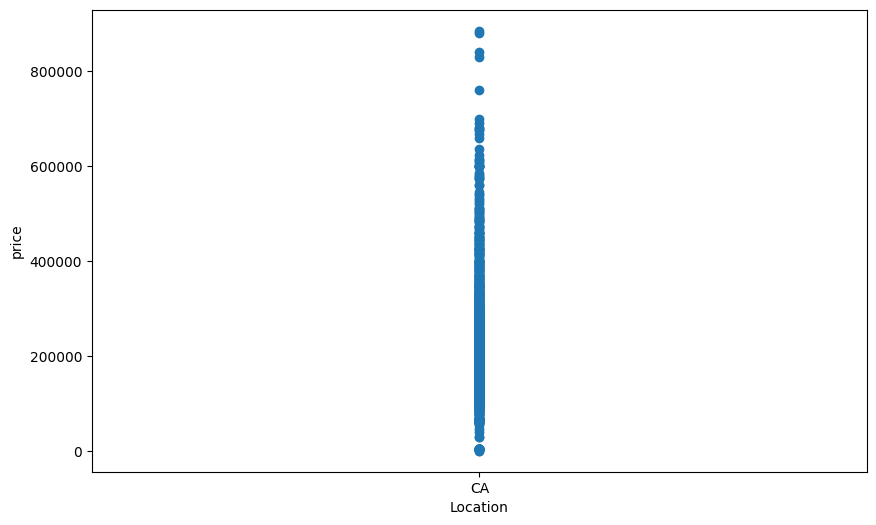

In [83]:
# plot
plt.scatter(y = df1['price'],x = df1['state'])
plt.xlabel('Location')
plt.ylabel('price')
plt.show()

7. With Hierarchical Indexing, rearrange the data to create a second DataFrame which will have first level of index of city, second level of index of zip, columns of bed, bath and sale_date. Please also rename index and column to make them more understandable, such as change zip to zipcode. Display the first eight rows of data. 8. Reshape the above two newly created DataFrames and merge them

In [70]:
df2 = pd.read_csv('Sacramentorealestatetransactions.csv')

# Set the hierarchical index
df2 = df2.set_index(['city', 'zip'])
df2.index.names = ['City', 'Zipcode']
df2 = df2[['beds','baths','sale_date']]
df2.head(8)

beds  baths                     sale_date
City       Zipcode                                           
SACRAMENTO 95838       2      1  Wed May 21 00:00:00 EDT 2008
           95823       3      1  Wed May 21 00:00:00 EDT 2008
           95815       2      1  Wed May 21 00:00:00 EDT 2008
           95815       2      1  Wed May 21 00:00:00 EDT 2008
           95824       2      1  Wed May 21 00:00:00 EDT 2008
           95841       3      1  Wed May 21 00:00:00 EDT 2008
           95842       3      2  Wed May 21 00:00:00 EDT 2008
           95820       3      1  Wed May 21 00:00:00 EDT 2008

In [71]:
print(df1.shape,df2.shape)

(985, 10) (985, 3)


8. Reshape the above two newly created DataFrames and merge them

In [72]:
df1.merge(df2)

,street,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,3526 HIGH ST,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
2,3526 HIGH ST,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
3,3526 HIGH ST,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
4,3526 HIGH ST,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
...,...,...,...,...,...,...,...,...,...,...
37486,3882 YELLOWSTONE LN,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915
37487,3882 YELLOWSTONE LN,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915
37488,3882 YELLOWSTONE LN,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915
37489,3882 YELLOWSTONE LN,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


Data Aggregation on credit-data-non-null.csv file In this exercise, we will use various techniques to do data aggregation on the data from        credit-data-non-null.csv file to answer the following questions:                                                                                        

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("credit-data-non-null.csv")
df

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.000627,76,0,60.000000,0.0,5,0,0,0,0.0
149996,0,0.236450,29,0,349.000000,0.0,3,0,0,0,0.0
149997,0,0.037548,84,0,25.000000,1.0,5,0,0,0,0.0
149998,0,0.871976,50,0,4132.000000,0.0,11,0,1,0,3.0


9. Write a custom function called cap_value(x, cap) that will set x to the cap if x > cap. Then apply it to debt_ratio with a cap of 5

In [23]:
def cap_value(x:float,cap:float):
  cvalue= cap if x > cap else x
  return cvalue
res = [cap_value(x,cap = 5) for x in df['debt_ratio']]
print(res[:100])

[0.8029821290000001, 0.1218762009999999, 0.085113375, 0.036049682, 0.024925695, 0.375606969, 0.2099400169999999, 0.606290901, 0.3094762099999999, 0.53152876, 0.298354075, 0.382964747, 5, 0.2098917539999999, 0.1882740599999999, 0.527887839, 0.0658682629999999, 0.4300463379999999, 0.475841386, 0.241103559, 0.085512189, 0.241621845, 1.595253368, 0.0976721859999999, 0.042383047, 0.0117612469999999, 0.436102527, 0.155201143, 0.4727030629999999, 0.313812313, 0.257731959, 0.073538769, 0.5678580349999999, 0.134078212, 0.00999001, 0.808340474, 0.5395544639999998, 0.048211004, 0.1701256139999999, 5, 0.177787036, 0.011167837, 0.6893704849999999, 0.393662026, 0.256339661, 5, 0.8247250919999999, 0.306381499, 0.0080645159999999, 0.073147745, 0.016921775, 0.351258937, 0.2616099069999999, 0.241135663, 0.0080342799999999, 1.051397656, 0.549877805, 0.540983607, 0.3164163649999999, 0.681045752, 0.111444278, 0.16106176, 0.2626118069999999, 0.369590815, 5, 0.182881653, 0.1166143469999999, 0.694646949, 0.07

10.Use groupby to calculate the percent of customers that went bad for each age

In [24]:

# Group by 'age' and sum all columns
df_group = df.groupby(['age']).sum()

# Convert values into percentages
df_group = df_group.apply(lambda x: x / np.sum(x) * 100)

# Ensure only the first column remains
df_group = df_group.iloc[:, :1]

# Multiply 'serious_dlqin2yrs' by 100 (if it exists in the dataset)
if 'serious_dlqin2yrs' in df_group.columns:
    df_group['serious_dlqin2yrs'] = df_group['serious_dlqin2yrs'] * 100

# Display the result
print(df_group)


     serious_dlqin2yrs
age                   
0             0.000000
21           12.966288
22           35.906643
23           69.818472
24           97.745861
..                 ...
102           0.000000
103           0.000000
105           0.000000
107           0.000000
109           0.000000

[86 rows x 1 columns]


11.Add a new column age_group for the DataFrame. Divide the age into groups of every 10 years in ascending order, then rearrange the data to match the age_group categoriza- tion. Display the first eight rows of data. Do some plotting to reflect it. Use age_group for data aggregation on revolving_utilization_of_unsecured_lines and monthly_income. Display the result

In [27]:
df['age_group']=df.age.apply(lambda x: x//10)
df.sort_values(by=['age_group'],axis=0, inplace=True)
df.head(8)


,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,age_group
52647,0,1.000000,0,1,0.436927,6000.0,6,0,2,0,2.0,0
149922,0,1.000000,24,0,29.000000,0.0,2,0,0,0,0.0,2
149941,0,1.000000,23,98,0.000000,764.0,0,98,0,98,0.0,2
149938,0,0.000000,27,0,1814.000000,0.0,3,0,1,0,0.0,2
149973,0,1.000000,26,1,0.000000,820.0,0,1,0,0,0.0,2
28,0,1.000000,24,0,0.472703,750.0,1,0,0,0,0.0,2
27,0,0.704074,28,1,0.155201,4200.0,8,0,0,0,0.0,2
25,0,0.452516,24,0,0.011761,3400.0,1,0,0,0,0.0,2


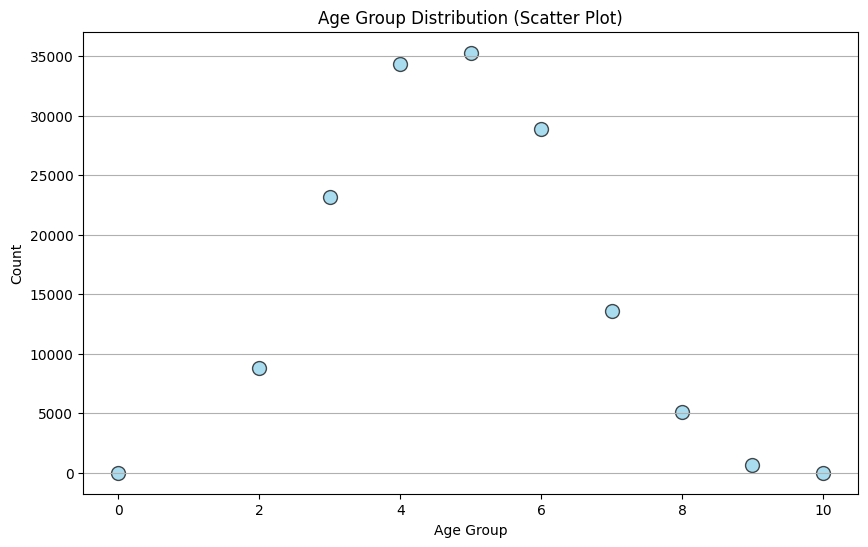

In [28]:
#do some plotting to reflect it.
age_group_counts = df['age_group'].value_counts().sort_index()
# Create x and y values for scatter plot
x_values = age_group_counts.index
y_values = age_group_counts.values

# Plotting with scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='skyblue', s=100, edgecolor='black', alpha=0.7)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution (Scatter Plot)')
plt.grid(axis='y')
plt.show()

In [29]:
#Use age_group for data aggregation on revolving_utilization_of_unsecured_lines and monthly_income. Display the result.
df_group2=df[['revolving_utilization_of_unsecured_lines', 'age_group', 'monthly_income']]
df_group2.groupby(['age_group']).mean()

,revolving_utilization_of_unsecured_lines,monthly_income
age_group,,
0,1.000000,6000.000000
2,4.380330,2554.771088
3,9.198001,4807.072467
4,7.488347,6150.727463
5,6.489113,6356.361406
6,3.748979,5651.115136
7,3.893524,4272.642085
8,1.460974,3912.043707
9,0.125559,3611.887240


12. Regroup data using number_real_estate_loans_or_lines and serious_dlqin2yrs, display the first eight rows of data and do some plotting to reflect this it. Then do count, mean, max, min on revolving_utilization_of_unsecured_lines and monthly_income. Display the result. Then select the top five monthly_income values by group and display it.

In [31]:
#  Regroup data using number_real_estate_loans_or_lines and serious_dlqin2yrs, displaythe first eight rows of data
df_rgp1 = df.groupby(['number_real_estate_loans_or_lines', 'serious_dlqin2yrs'])
df_rgp1.head(8)

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,age_group
52647,0,1.000000,0,1,0.436927,6000.0,6,0,2,0,2.0,0
149922,0,1.000000,24,0,29.000000,0.0,2,0,0,0,0.0,2
149941,0,1.000000,23,98,0.000000,764.0,0,98,0,98,0.0,2
149938,0,0.000000,27,0,1814.000000,0.0,3,0,1,0,0.0,2
149973,0,1.000000,26,1,0.000000,820.0,0,1,0,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129513,0,0.003928,76,0,52112.000000,0.0,27,0,23,0,0.0,7
35730,0,0.233544,73,7,0.789275,13799.0,24,0,14,3,0.0,7
103157,0,0.034579,76,2,2.054309,8377.0,27,0,15,0,1.0,7
49840,0,0.002280,73,0,3.593683,14500.0,26,0,23,0,0.0,7


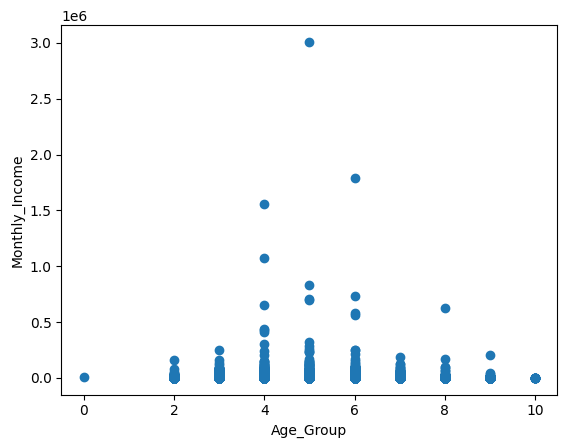

In [32]:
# Do some plotting to reflect this it
a=df['age_group']
b=df['monthly_income']
plt.scatter(a,b)
plt.xlabel('Age_Group')
plt.ylabel('Monthly_Income')
plt.show()

In [46]:
# Then do count, mean,max, min on revolving_utilization_of_unsecured_lines and monthly_income.
df_grp3 = df.groupby(['number_real_estate_loans_or_lines', 'serious_dlqin2yrs']).agg([np.min, np.max, np.median, np.mean, np.count_nonzero])
df_grp3.head()


C:\Users\saipr\AppData\Local\Temp\ipykernel_1468\1139506978.py:2: FutureWarning: The provided callable <function min at 0x0000025A56460860> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_grp3 = df.groupby(['number_real_estate_loans_or_lines', 'serious_dlqin2yrs']).agg([np.min, np.max, np.median, np.mean, np.count_nonzero])
C:\Users\saipr\AppData\Local\Temp\ipykernel_1468\1139506978.py:2: FutureWarning: The provided callable <function max at 0x0000025A56460720> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_grp3 = df.groupby(['number_real_estate_loans_or_lines', 'serious_dlqin2yrs']).agg([np.min, np.max, np.median, np.mean, np.count_nonzero])
C:\Users\saipr\AppData\Local\Temp\ipykernel_1468\1139506978.py:2: FutureWarning: The provided 

revolving_utilization_of_unsecured_lines  \
                                                                                         min   
number_real_estate_loans_or_lines serious_dlqin2yrs                                            
0                                 0                                                      0.0   
                                  1                                                      0.0   
1                                 0                                                      0.0   
                                  1                                                      0.0   
2                                 0                                                      0.0   

                                                                        \
                                                         max    median   
number_real_estate_loans_or_lines serious_dlqin2yrs                      
0                                 0                  20514.0  0.131577   
                                  1                   6190.0  0.968048   
1                                 0                  29110.0  0.113683   
                                  1                   3629.0  0.779080   
2                                 0                  50708.0  0.161309   

                                                                              \
                                                          mean count_nonzero   
number_real_estate_loans_or_lines serious_dlqin2yrs                            
0                                 0                   3.059281         47043   
                                  1                   2.915416          4532   
1                                 0                   7.185183         45944   
                                  1                   3.683796          2657   
2                                 0                  10.211578         27926   

                                                    age              \
                                                    min  max median   
number_real_estate_loans_or_lines serious_dlqin2yrs                   
0                                 0                  21  109   51.0   
                                  1                  21  101   40.0   
1                                 0                  21  109   53.0   
                                  1                  24   95   48.0   
2                                 0                   0  103   52.0   

                                                                              \
                                                          mean count_nonzero   
number_real_estate_loans_or_lines serious_dlqin2yrs                            
0                                 0                  51.984510         51516   
                                  1                  42.421875          4672   
1                                 0                  53.658540         49590   
                                  1                  48.872635          2748   
2                                 0                  52.324461         29756   

                                                     ... number_of_dependents  \
                                                     ...                  min   
number_real_estate_loans_or_lines serious_dlqin2yrs  ...                        
0                                 0                  ...                  0.0   
                                  1                  ...                  0.0   
1                                 0                  ...                  0.0   
                                  1                  ...                  0.0   
2                                 0                  ...                  0.0   

                                                                            \
                                                      max median      mean   
number_real_estate_loans_or_lines 

In [38]:
print(df_grp3.columns)

MultiIndex([(   'revolving_utilization_of_unsecured_lines',           'min'),
            (   'revolving_utilization_of_unsecured_lines',           'max'),
            (   'revolving_utilization_of_unsecured_lines',        'median'),
            (   'revolving_utilization_of_unsecured_lines',          'mean'),
            (   'revolving_utilization_of_unsecured_lines', 'count_nonzero'),
            (                                        'age',           'min'),
            (                                        'age',           'max'),
            (                                        'age',        'median'),
            (                                        'age',          'mean'),
            (                                        'age', 'count_nonzero'),
            ('number_of_time30-59_days_past_due_not_worse',           'min'),
            ('number_of_time30-59_days_past_due_not_worse',           'max'),
            ('number_of_time30-59_days_past_due_not_worse',     

In [40]:
# Then select the top five monthly_income values by group and display it.
top_monthly_income = df_grp3['monthly_income']['mean'].nlargest(5)
print(top_monthly_income)

number_real_estate_loans_or_lines  serious_dlqin2yrs
16                                 0                    115249.666667
32                                 0                     70000.000000
29                                 1                     55966.000000
26                                 0                     48000.000000
25                                 1                     37000.000000
Name: mean, dtype: float64
